In [1]:
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv("./data/carprice.csv", encoding="ISO-8859-1")

In [5]:
data.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [6]:
data.tail()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353
499,Marla,Camaron.marla@hotmail.com,marlal,1,46.731152,61370.67766,9391.341628,462946.4924,45107.22566


In [8]:
data.sample(5)

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
324,"Thompson, Alvin R.",interdum.ligula@Phasellus.edu,Iraq,0,36.375098,67032.16445,7666.530300,516738.17240,41137.89459
369,"Stafford, Berk Y.",Quisque@ultriciessem.net,Dominican Republic,0,42.992297,60325.20676,10128.115100,62149.94034,29754.66271
120,Vernon Kidd,sapien.imperdiet.ornare@vitaeerat.edu,Macedonia,1,34.498057,77206.48386,8493.098575,411070.48280,42213.69644
424,Curran,risus@Sedmalesuada.net,Tokelau,1,37.363626,51111.76605,9057.600508,461366.78290,31408.62631
109,Wing Parks,sagittis@magnased.ca,San Marino,1,41.854954,69946.93924,9010.648633,778537.20950,54973.02495


In [9]:
data.shape

(500, 9)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [11]:
data.isnull().sum()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

In [12]:
data.nunique().sum()

3711

In [13]:
data.duplicated().sum()

0

In [15]:
data=data.drop(labels=["customer name","customer e-mail","country","gender","age"],axis=1)

In [16]:
data

,annual Salary,credit card debt,net worth,car purchase amount
0,62812.09301,11609.380910,238961.2505,35321.45877
1,66646.89292,9572.957136,530973.9078,45115.52566
2,53798.55112,11160.355060,638467.1773,42925.70921
3,79370.03798,14426.164850,548599.0524,67422.36313
4,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...
495,71942.40291,6995.902524,541670.1016,48901.44342
496,56039.49793,12301.456790,360419.0988,31491.41457
497,68888.77805,10611.606860,764531.3203,64147.28888
498,49811.99062,14013.034510,337826.6382,45442.15353


In [17]:
numerical_cols=data.columns[data.dtypes!="object"]

In [18]:
numerical_cols

Index(['annual Salary', 'credit card debt', 'net worth',
       'car purchase amount'],
      dtype='object')

In [20]:
data[numerical_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
annual Salary,500.0,62127.239608,11703.378228,20000.0,54391.977195,62915.497035,70117.862005,100000.0
credit card debt,500.0,9607.645049,3489.187973,100.0,7397.515792,9655.035568,11798.867487,20000.0
net worth,500.0,431475.713625,173536.756340,20000.0,299824.195900,426750.120650,557324.478725,1000000.0
car purchase amount,500.0,44209.799218,10773.178744,9000.0,37629.896040,43997.783390,51254.709517,80000.0


c:\Users\Prachi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


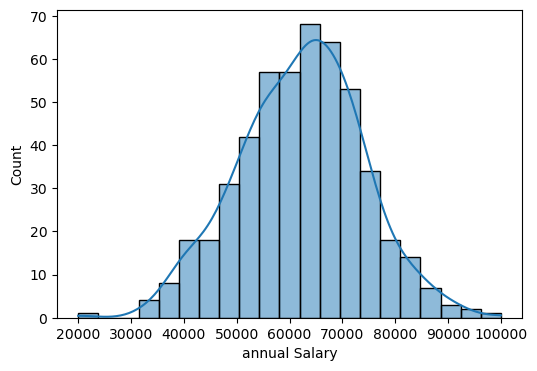

c:\Users\Prachi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


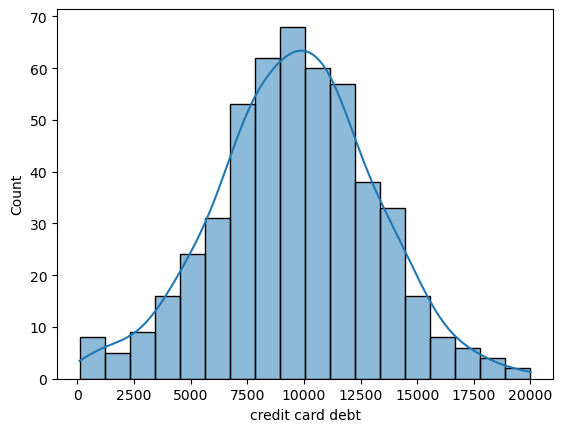

c:\Users\Prachi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


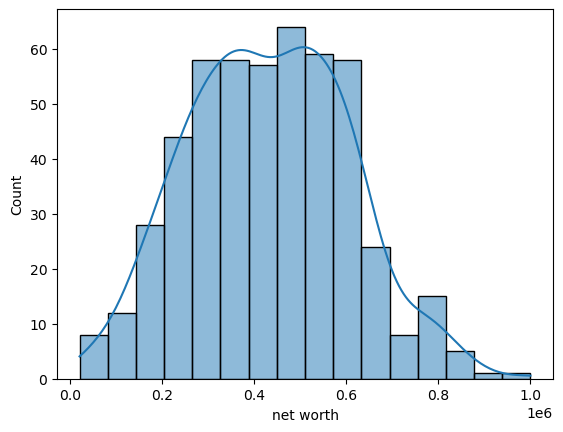

c:\Users\Prachi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


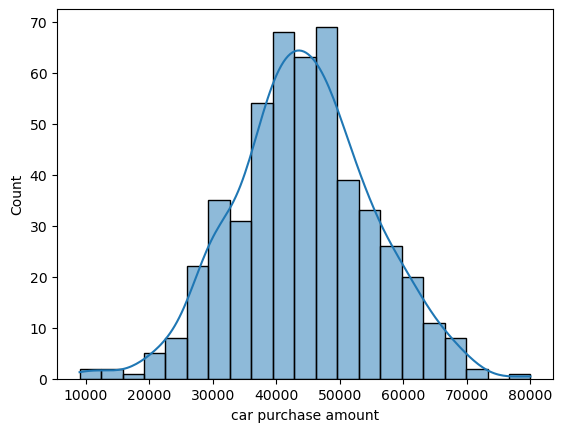

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
for col in numerical_cols:
    sns.histplot(data=data,x=col,kde=True)
    print("\n")
    plt.show()

<Axes: >

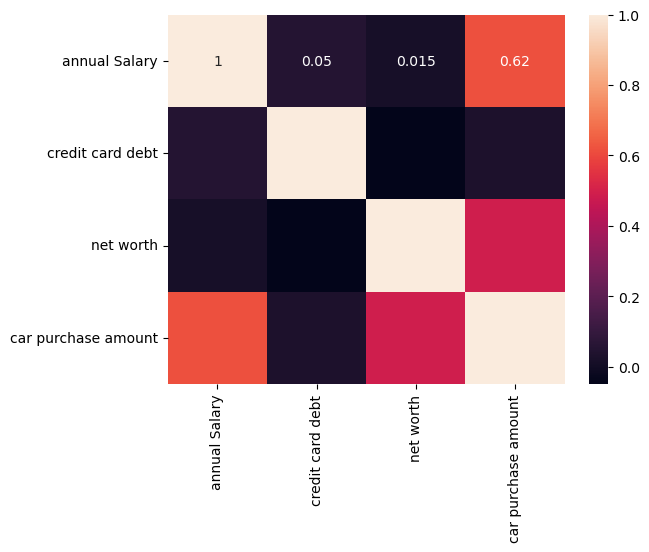

In [23]:
sns.heatmap(data[numerical_cols].corr(),annot=True)